### Megan Hoeksema

### Final Project

#### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Data import

In [189]:
df = pd.read_csv('smokeban.csv', index_col = 0)
df

,smoker,ban,age,education,afam,hispanic,gender
1,yes,yes,41,hs,no,no,female
2,yes,yes,44,some college,no,no,female
3,no,no,19,some college,no,no,female
4,yes,no,29,hs,no,no,female
5,no,yes,28,some college,no,no,female
...,...,...,...,...,...,...,...
9996,no,no,55,hs,no,no,male
9997,no,no,31,master,no,no,male
9998,no,yes,36,some college,no,no,female
9999,yes,no,42,hs,no,no,female


In [190]:
for col in df:
  print(df[col].unique())

['yes' 'no']
['yes' 'no']
[41 44 19 29 28 40 47 36 49 33 32 48 24 39 60 37 31 27 50 45 23 51 57 30
 18 58 46 26 34 35 43 54 20 62 56 22 66 67 76 42 21 38 55 61 52 25 65 78
 71 53 63 59 79 64 70 68 81 73 88 77 72 69 75 80 74]
['hs' 'some college' 'master' 'hs drop out' 'college']
['no' 'yes']
['no' 'yes']
['female' 'male']


#### Data Pre-processing

In [191]:
# Check for missing data

df.isna().sum()

smoker       0
ban          0
age          0
education    0
afam         0
hispanic     0
gender       0
dtype: int64

In [192]:
df2 = df.copy()
df2['smoker'].replace(['yes', 'no'], [0, 1], inplace = True)
df2['ban'].replace(['yes', 'no'], [0, 1], inplace = True)
df2['education'].replace(['hs', 'some college', 'master', 'hs drop out', 'college'], [0, 1, 2, 3, 4], inplace = True)
df2['afam'].replace(['yes', 'no'], [0, 1], inplace = True)
df2['hispanic'].replace(['yes', 'no'], [0, 1], inplace = True)
df2['gender'].replace(['male', 'female'], [0, 1], inplace = True)

df2.head()

,smoker,ban,age,education,afam,hispanic,gender
1,0,0,41,0,1,1,1
2,0,0,44,1,1,1,1
3,1,1,19,1,1,1,1
4,0,1,29,0,1,1,1
5,1,0,28,1,1,1,1


In [193]:
# Scaling the data
scaler = MinMaxScaler()
contCols = ['age']
contCols
df2.loc[:,contCols] = scaler.fit_transform(df2.loc[:,contCols])
df2

,smoker,ban,age,education,afam,hispanic,gender
1,0,0,0.328571,0,1,1,1
2,0,0,0.371429,1,1,1,1
3,1,1,0.014286,1,1,1,1
4,0,1,0.157143,0,1,1,1
5,1,0,0.142857,1,1,1,1
...,...,...,...,...,...,...,...
9996,1,1,0.528571,0,1,1,0
9997,1,1,0.185714,2,1,1,0
9998,1,0,0.257143,1,1,1,1
9999,0,1,0.342857,0,1,1,1


#### Data Exploration

In [195]:
df3 = df['age']
df3.agg([np.mean, np.median, 'min', 'max', np.var, np.std, 'skew'])

mean       38.693200
median     37.000000
min        18.000000
max        88.000000
var       146.743748
std        12.113783
skew        0.513248
Name: age, dtype: float64

<AxesSubplot:xlabel='education', ylabel='age'>

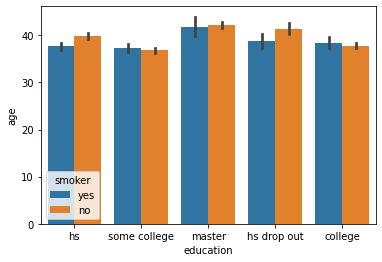

In [205]:
sns.barplot(x = 'education', y = 'age', hue = 'smoker', data = df)

<AxesSubplot:xlabel='gender', ylabel='Count'>

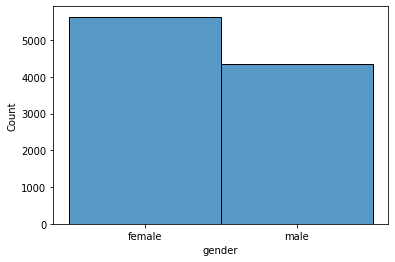

In [208]:
sns.histplot(data=df, x="gender")

<AxesSubplot:xlabel='ban', ylabel='Count'>

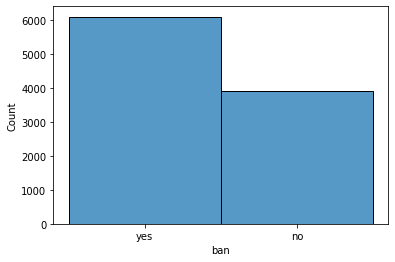

In [209]:
sns.histplot(data=df, x="ban")

<AxesSubplot:xlabel='ban', ylabel='Count'>

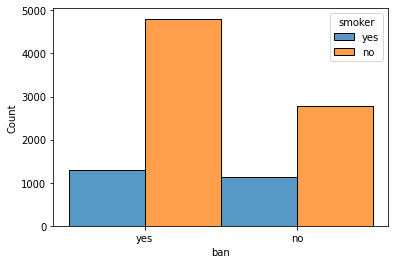

In [211]:
sns.histplot(data=df, x="ban", hue = 'smoker', )

#### Splitting the data

In [19]:
X = df2.drop(columns = ['smoker'])
y = df2['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Size of X Train: ' + str(len(X_train)))
print('Size of y train: ' + str(len(y_train)))
print('Size of X Test: ' + str(len(X_test)))
print('Size of y test: ' + str(len(y_test)))

Size of X Train: 7000
Size of y train: 7000
Size of X Test: 3000
Size of y test: 3000


#### Model Construction

In [28]:
# Decision Tree Classifier

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
preds_dt_train = clf_dt.predict(X_train)
preds_dt_test = clf_dt.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_dt_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_dt_test)))

accuracy_score of training set: 0.804
accuracy_score of test set: 0.705


In [33]:
# Random Forest Classifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
preds_rf_train = clf_rf.predict(X_train)
preds_rf_test = clf_rf.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_rf_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_rf_test)))

accuracy_score of training set: 0.804
accuracy_score of test set: 0.7213333333333334


In [38]:
# KNN Classifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
preds_knn_train = clf_knn.predict(X_train)
preds_knn_test = clf_knn.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_knn_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_knn_test)))

accuracy_score of training set: 0.7714285714285715
accuracy_score of test set: 0.724


In [41]:
# Naive Bayes (Categorical)

clf_cnb = CategoricalNB()
clf_cnb.fit(X_train, y_train)
preds_cnb_train = clf_cnb.predict(X_train)
preds_cnb_test = clf_cnb.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_cnb_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_cnb_test)))

accuracy_score of training set: 0.7561428571428571
accuracy_score of test set: 0.7613333333333333


#### Model Evaluation

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


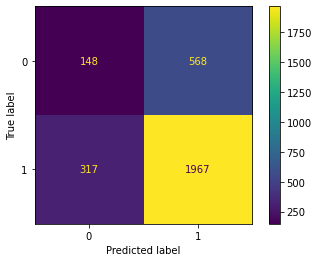

In [44]:
plot_confusion_matrix(clf_dt, X_test, y_test)

In [48]:
print(classification_report(y_test, preds_dt_test))

              precision    recall  f1-score   support

           0       0.32      0.21      0.25       716
           1       0.78      0.86      0.82      2284

    accuracy                           0.70      3000
   macro avg       0.55      0.53      0.53      3000
weighted avg       0.67      0.70      0.68      3000



/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


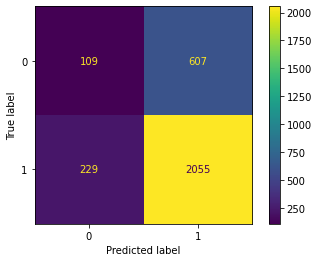

In [45]:
plot_confusion_matrix(clf_rf, X_test, y_test)

In [49]:
print(classification_report(y_test, preds_rf_test))

              precision    recall  f1-score   support

           0       0.32      0.15      0.21       716
           1       0.77      0.90      0.83      2284

    accuracy                           0.72      3000
   macro avg       0.55      0.53      0.52      3000
weighted avg       0.66      0.72      0.68      3000



/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


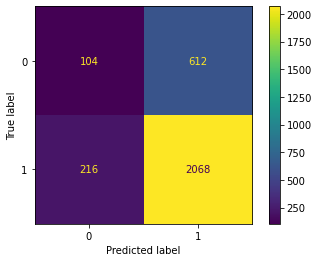

In [46]:
plot_confusion_matrix(clf_knn, X_test, y_test)

In [50]:
print(classification_report(y_test, preds_knn_test))

              precision    recall  f1-score   support

           0       0.33      0.15      0.20       716
           1       0.77      0.91      0.83      2284

    accuracy                           0.72      3000
   macro avg       0.55      0.53      0.52      3000
weighted avg       0.67      0.72      0.68      3000



/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


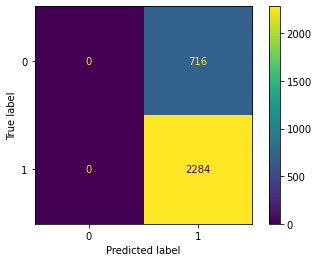

In [47]:
plot_confusion_matrix(clf_cnb, X_test, y_test)

In [51]:
print(classification_report(y_test, preds_cnb_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       716
           1       0.76      1.00      0.86      2284

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### Model Tuning

In [155]:
# Decision Tree

param_grid_dt = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': range(1, 30), 
                 'max_features':[0.2, 0.4, 0.6, 0.8, 1.0]}

grid_search = GridSearchCV(clf_dt, param_grid_dt, cv = 8)
grid_search.fit(X_test, y_test)
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.6)

In [156]:
final_dt = grid_search.best_estimator_
final_dt.fit(X_test, y_test.values.ravel())
preds_dt_final = final_dt.predict(X_test)

print('accuracy_score of Decision Tree Model: ' + str(round(accuracy_score(y_test, preds_dt_final),2)))

accuracy_score of Decision Tree Model: 0.76


In [165]:
# Random Forest

param_grid_rf = {'max_features':[0.2, 0.4, 0.6, 0.8], 'n_estimators':[3, 10, 30, 100], 'max_depth': range(1, 30)}

grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, cv = 8)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.8, n_estimators=10)

In [166]:
final_rf = grid_search_rf.best_estimator_
final_rf.fit(X_test, y_test.values.ravel())
preds_rf_final = final_rf.predict(X_test)

print('accuracy_score of Random Forest Model: ' + str(round(accuracy_score(y_test, preds_rf_final),2)))

accuracy_score of Random Forest Model: 0.77


In [177]:
# KNN

param_grid_knn = {'n_neighbors': list(range(1,51))}

grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv = 8)
grid_search_knn.fit(X_test, y_test)
grid_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=39)

In [178]:
final_knn = grid_search_knn.best_estimator_
final_knn.fit(X_test, y_test.values.ravel())
preds_knn_final = final_knn.predict(X_test)

print('accuracy_score of KNN Model: ' + str(round(accuracy_score(y_test, preds_knn_final),2)))

accuracy_score of KNN Model: 0.76


In [138]:
# Naive Bayes

param_grid_cnb = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],'fit_prior': [True, False],
                  'min_categories': [18, 25, 30]}

grid_search_cnb = GridSearchCV(clf_cnb, param_grid_cnb, cv = 8)
grid_search_cnb.fit(X_test, y_test)
grid_search_cnb.best_params_

{'alpha': 0.01, 'fit_prior': True, 'min_categories': 18}

In [139]:
final_cnb = grid_search_cnb.best_estimator_
final_cnb.fit(X_test, y_test.values.ravel())
preds_cnb_final = final_cnb.predict(X_test)

print('accuracy_score of Naive Bayes Model: ' + str(round(accuracy_score(y_test, preds_cnb_final),2)))

accuracy_score of Naive Bayes Model: 0.76
